In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# Descriptive analysis of the database.

From the authors: 
"All the patients suffered heart attacks at some point in the past. Some are still alive and some are not. The survival and still-alive variables, when taken together, indicate whether a patient survived for at least one year following the heart attack.
The problem addressed by past researchers was to predict from the other variables whether or not the patient will survive at least one year. The most difficult part of this problem is correctly predicting that the patient will NOT survive. (Part of the difficulty seems to be the size of the data set.)
survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.


   1. survival -- the number of months patient survived (has survived, if patient is still alive).  Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive.  Check the second variable to confirm this.  Such patients cannot be used for the prediction task mentioned above.
   2. still-alive -- a binary variable.  0=dead at end of survival period, 1 means still alive
   3. age-at-heart-attack -- age in years when heart attack occurred
   4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart.  0=no fluid, 1=fluid
   5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal
   6. epss -- E-point septal separation, another measure of contractility.  Larger numbers are increasingly abnormal.
   7. lvdd -- left ventricular end-diastolic dimension.  This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
   8. wall-motion-score -- a measure of how the segments of the left ventricle are moving
   9. wall-motion-index -- equals wall-motion-score divided by number of segments seen.  Usually 12-13 segments are seen in an echocardiogram.  Use this variable INSTEAD of the wall motion score.
   10. mult -- a derivate var which can be ignored
   11. name -- the name of the patient (I have replaced them with "name")
   12. group -- meaningless, ignore it
   13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year.  1 means patient was alive at 1 year."



Let's load our dataset. 

In [65]:
features=['Survival', 'Still-Alive', 'Age-At-Heart-Attack', 'Pericardial-effusion','Fractional-Shortening', 'EPSS', 'LVDD', 'Wall-Motion-Score', 'Wall-Motion-Index', 'Mult', 'Name', 'Group', 'Alive-At1']
data = pd.read_csv("echocardiogram.data", header=None, names=features, delimiter=',')
data.head()

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index,Mult,Name,Group,Alive-At1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


Some of the features are described as useless by the authors. Let's remove them. 

In [66]:
columns_to_remove = ['Mult', 'Name', 'Group']
data = data.drop(columns=columns_to_remove, axis=0)
data.head()

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index,Alive-At1
0,11,0,71,0,0.260,9,4.600,14,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0
2,16,0,55,0,0.260,4,3.420,14,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0


## Number of entries in the dataset

In [67]:
print("This data frame is made of", data.shape[0],"entries, and", data.shape[1], "features" )

This data frame is made of 132 entries, and 10 features


132 individuals for 10 features is low, we will see in the next sections how we can deal with that issue. 

As we can see, there are a lot of '?' in the dataset. We need to remove them if we want to use the algorithms at our disposal. 

In [68]:
(data=='?').sum(axis=0)

Survival                  2
Still-Alive               1
Age-At-Heart-Attack       5
Pericardial-effusion      1
Fractional-Shortening     8
EPSS                     15
LVDD                     11
Wall-Motion-Score         4
Wall-Motion-Index         1
Alive-At1                58
dtype: int64

## Remove all the '?' of the dataframe

In [69]:
data.replace('?', pd.NA, inplace=True)
display(data)

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index,Alive-At1
0,11,0,71,0,0.260,9,4.600,14,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0
2,16,0,55,0,0.260,4,3.420,14,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0
...,...,...,...,...,...,...,...,...,...,...
127,7.5,1,64,0,0.24,12.9,4.72,12,1,NaN
128,41,0,64,0,0.28,5.40,5.47,11,1.10,NaN
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,NaN
130,22,0,57,0,0.14,16.1,4.36,15,1.36,NaN


## Types of data
The dataset has not been well formated, all the values are object. 

In [70]:
print(data.dtypes)

Survival                 object
Still-Alive              object
Age-At-Heart-Attack      object
Pericardial-effusion     object
Fractional-Shortening    object
EPSS                     object
LVDD                     object
Wall-Motion-Score        object
Wall-Motion-Index        object
Alive-At1                object
dtype: object


Let's modify that in order to use it properly. We set all the values to Float64.

In [71]:
data=data.apply(lambda col:pd.to_numeric(col, errors='coerce')).astype('Float64')
print(data.dtypes)

Survival                 Float64
Still-Alive              Float64
Age-At-Heart-Attack      Float64
Pericardial-effusion     Float64
Fractional-Shortening    Float64
EPSS                     Float64
LVDD                     Float64
Wall-Motion-Score        Float64
Wall-Motion-Index        Float64
Alive-At1                Float64
dtype: object


# Visualize the data
## Histogram
The histogram allows us to observe the distribution of the different values for each feature. 


array([[<AxesSubplot:title={'center':'Survival'}>,
        <AxesSubplot:title={'center':'Still-Alive'}>,
        <AxesSubplot:title={'center':'Age-At-Heart-Attack'}>],
       [<AxesSubplot:title={'center':'Pericardial-effusion'}>,
        <AxesSubplot:title={'center':'Fractional-Shortening'}>,
        <AxesSubplot:title={'center':'EPSS'}>],
       [<AxesSubplot:title={'center':'LVDD'}>,
        <AxesSubplot:title={'center':'Wall-Motion-Score'}>,
        <AxesSubplot:title={'center':'Wall-Motion-Index'}>],
       [<AxesSubplot:title={'center':'Alive-At1'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

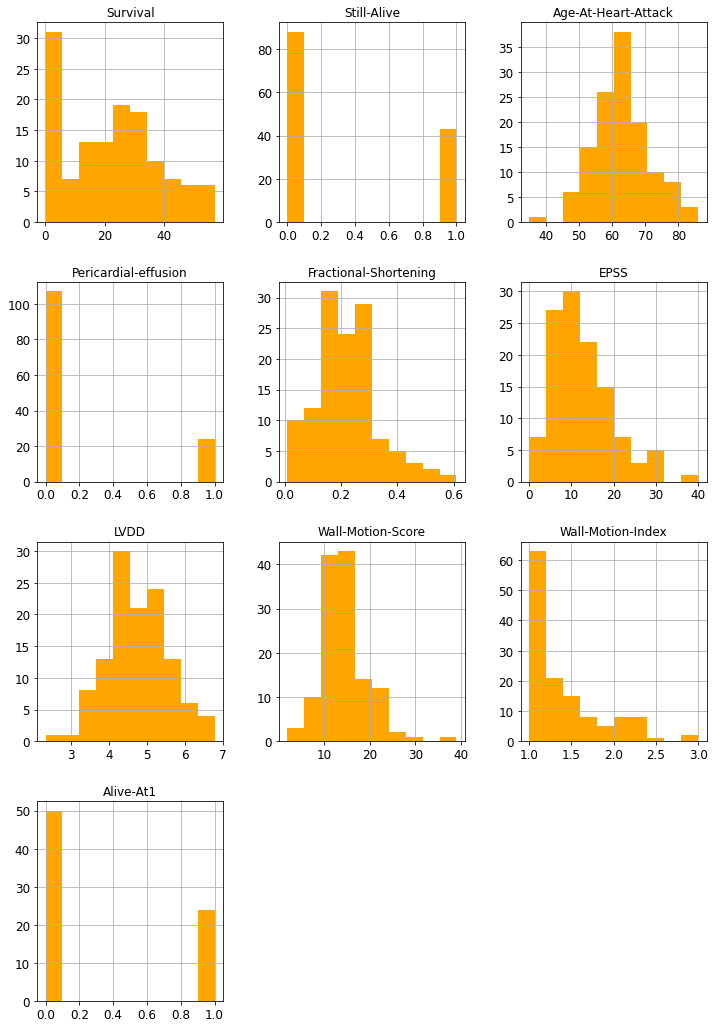

In [72]:
data.hist(bins=10, figsize=(12, 18), xlabelsize=12, ylabelsize=12, color='orange') # Plot a histogram for each feature. Define the size of the figure (12,18); change the number of bins as well and the xlabel and ylabel sizes

The histogram enables us to see that the classes are inbalanced. We will see later what we can do about it. 

Another problem is that there are a lot of NaN values, especially for the outcome that we need to predict (Alive-At1). This data will not be of any use as is does not provide information and prevent us from using pairplot and boxplot functions. 

In [73]:
nan_counts = data.isna().sum()
print("Number of NaN values in the data:", nan_counts)

Number of NaN values in the data: Survival                  2
Still-Alive               1
Age-At-Heart-Attack       5
Pericardial-effusion      1
Fractional-Shortening     8
EPSS                     15
LVDD                     11
Wall-Motion-Score         4
Wall-Motion-Index         1
Alive-At1                58
dtype: int64


Thus, we remove the individuals that have NaN values. 

In [156]:
data_wout_nan = data.dropna()
print("Number of NaN values in the training set:\n", data_wout_nan.isna().sum()) # checking that there is no more NaN values

Number of NaN values in the training set:
 Survival                 0
Still-Alive              0
Age-At-Heart-Attack      0
Pericardial-effusion     0
Fractional-Shortening    0
EPSS                     0
LVDD                     0
Wall-Motion-Score        0
Wall-Motion-Index        0
Alive-At1                0
dtype: int64


In [75]:
print(data_wout_nan.shape)

(61, 10)


We now dispose of only 61 individuals for 10 features. 

## Pairplots
We plot the different features according to the outcome 'Alive-At1'. Individuals who have 0 value are in blue whereas those who have 1 value are in orange. 

<Figure size 432x288 with 0 Axes>

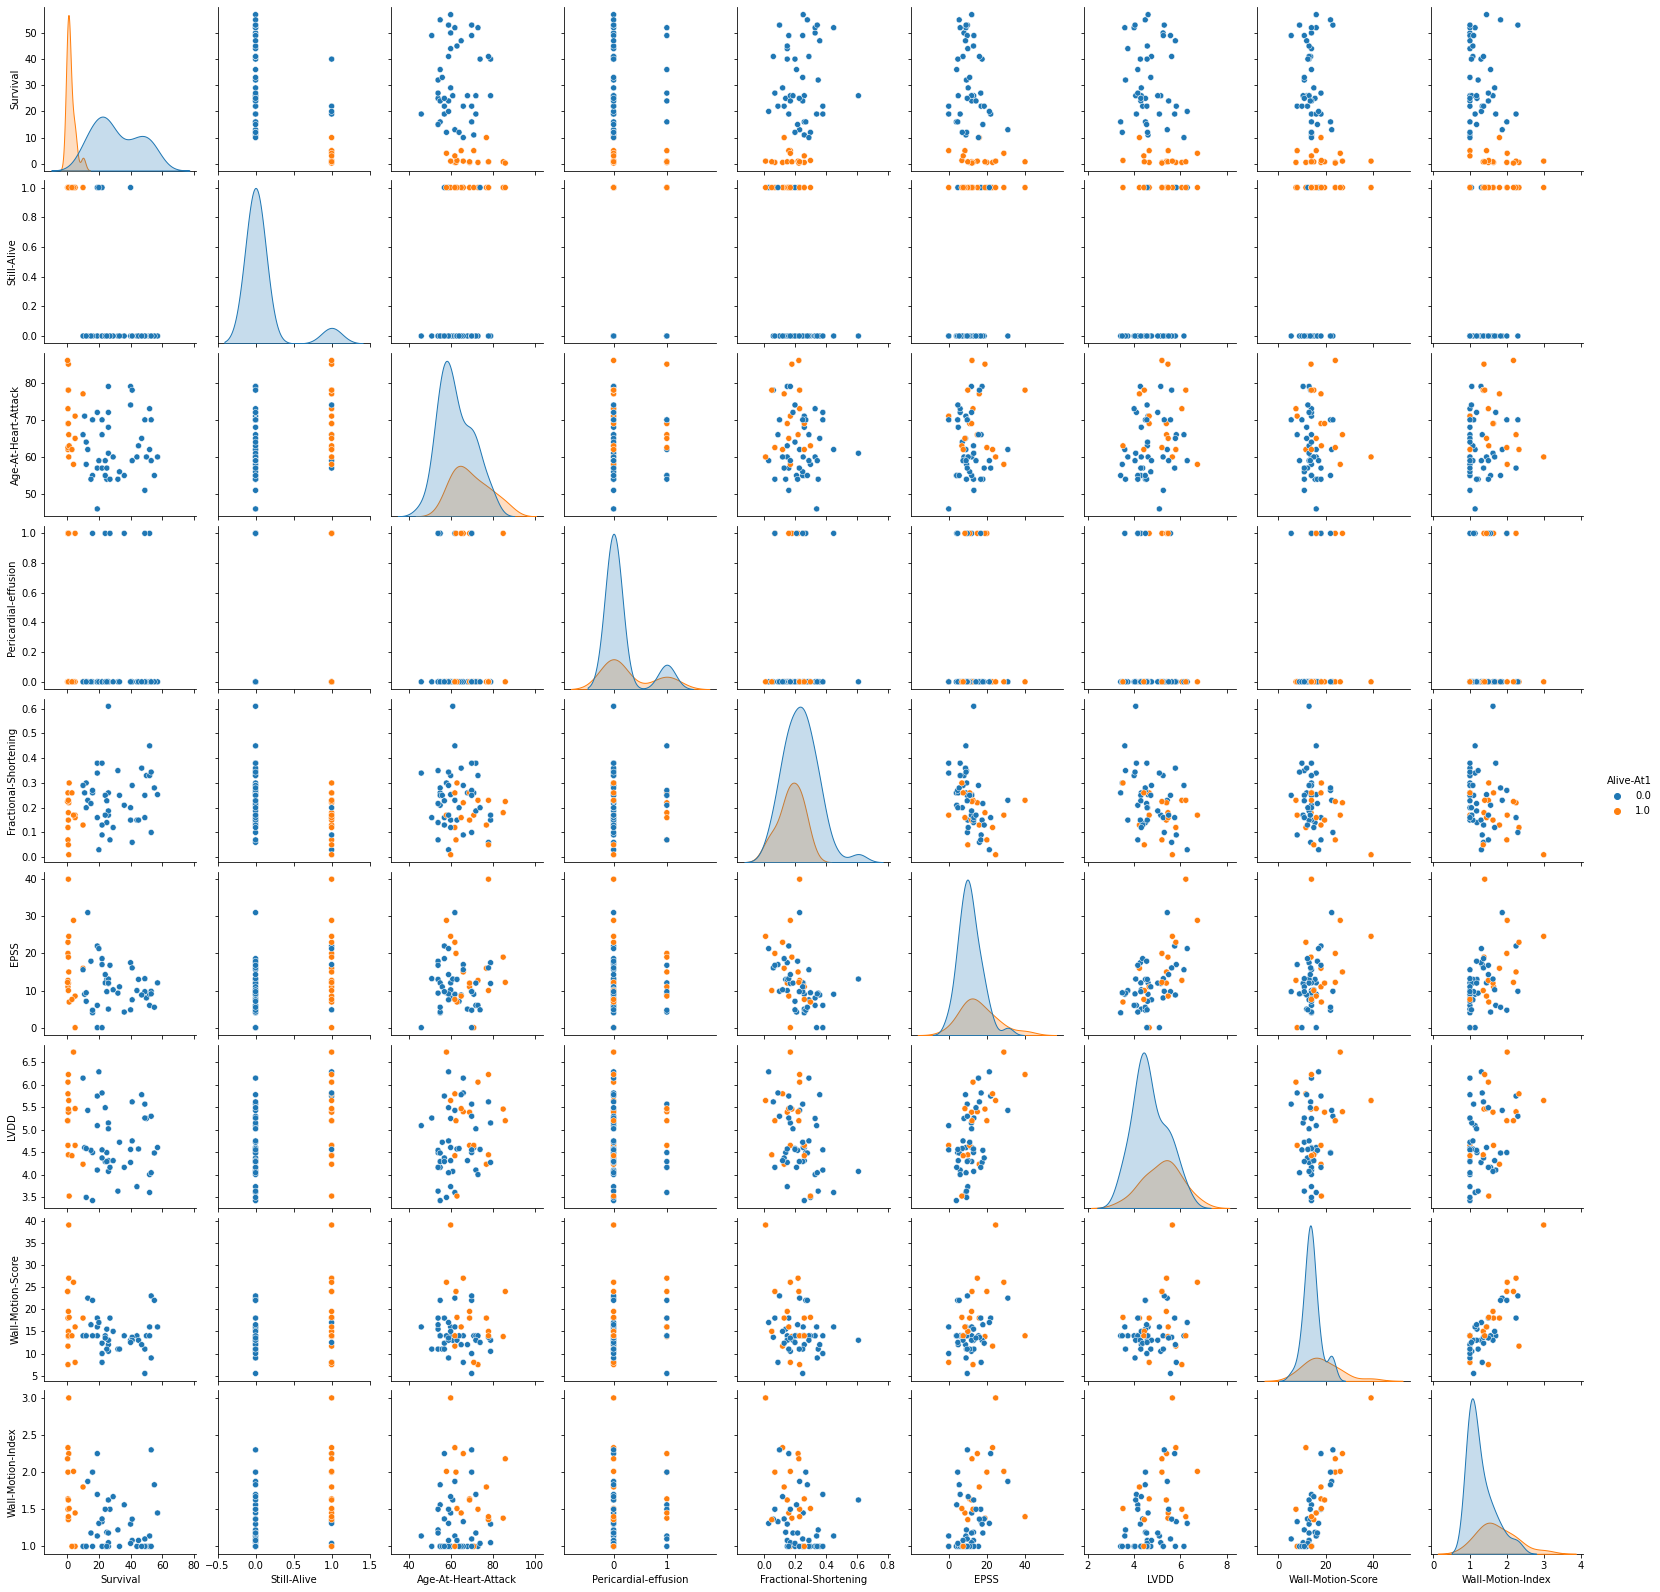

In [76]:
plt.figure()
sns.pairplot(data_wout_nan, hue='Alive-At1')


The relation between variables and the outcome is not so clear at first sight. 

### Statistical description
Before analysing graphically the distribution of the data in each feature, let's display their statistics. 

In [77]:
data_wout_nan.describe() 

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index,Alive-At1
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,23.122951,0.344262,64.484082,0.180328,0.218754,12.355049,4.830197,15.299016,1.406180,0.278689
std,17.951765,0.479070,8.697576,0.387651,0.106853,7.355945,0.774510,5.423565,0.449153,0.452075
min,0.250000,0.000000,46.000000,0.000000,0.010000,0.000000,3.420000,5.500000,1.000000,0.000000
25%,5.000000,0.000000,58.000000,0.000000,0.150000,8.000000,4.290000,12.500000,1.000000,0.000000
50%,22.000000,0.000000,62.529000,0.000000,0.220000,11.000000,4.603000,14.000000,1.310000,0.000000
75%,40.000000,1.000000,70.000000,0.000000,0.270000,16.000000,5.430000,17.000000,1.625000,1.000000
max,57.000000,1.000000,86.000000,1.000000,0.610000,40.000000,6.730000,39.000000,3.000000,1.000000


### Boxplots

Let's visually observe the mean, standard deviation and quartiles for each feature. We need to remove the 'Still-Alive' and 'Pericardial-effusion' features because they have only 0 and 1 values. However, we need to keep Alive-At1 values as we are ploting each feature according to the Alive-At1 value. 
As there is only 7 features, the last boxplot is empty. 

In [78]:
boxplot_data = data_wout_nan.drop(columns=['Still-Alive', 'Pericardial-effusion'])

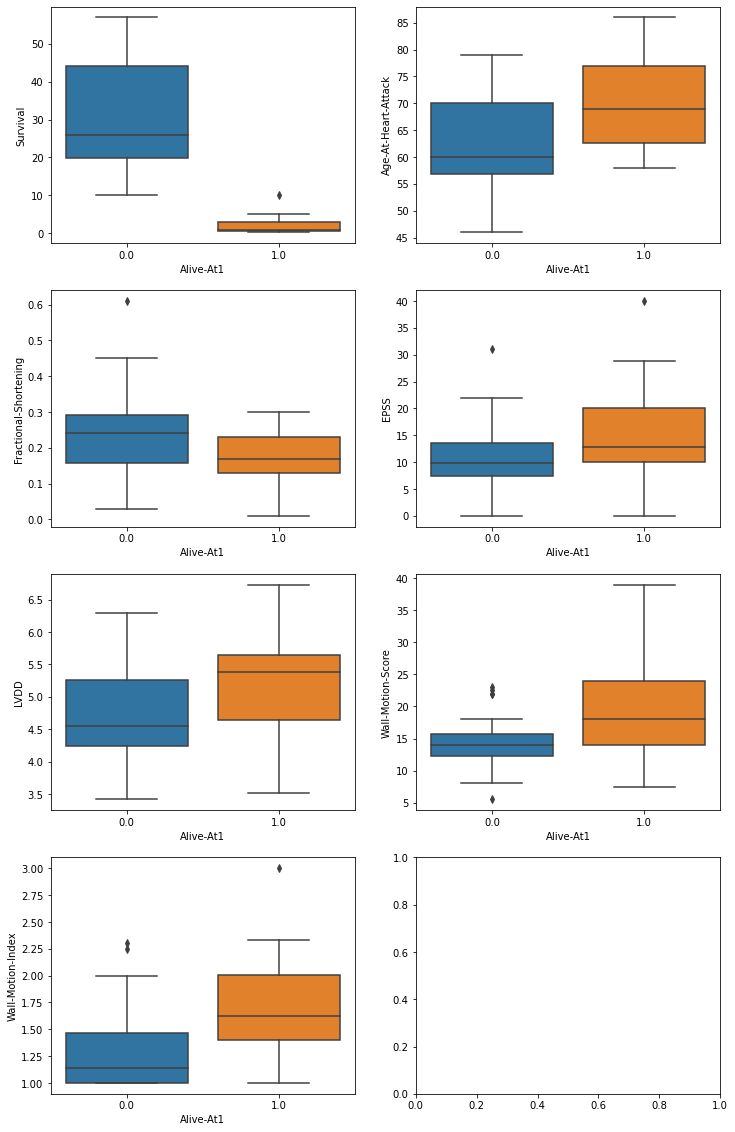

In [79]:
columns_to_plot = [col for col in boxplot_data.columns if col != 'Alive-At1']

num_rows = 4
num_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

# Flatten the axes array so that we can iterate over it easily
axes = np.array(axes).flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(x='Alive-At1', y=col, data=boxplot_data, ax=ax)


We can observe that for Fractional-Shortening, EPSS, Wall-Motion_score and Wall-Motion_Index, some subjects have values that are situated outside the first and third quartile. We will see in the next section how we can deal those values. 

# Preprocess the data
## Outliers
### Identifying outliers with zscore
We did not manage to identify the outliers with zscore due to an error in the data types. Zero floats are not managed by the zscore function of scipy.stats. 

### Identifying outliers with interquartile range
As we said before, we need to remove aberrant values of our dataset. For that, we will identify outliers individuals using the interquartile range. But first, we need to get rid of the 'Alive-At1' column which has only 0 or 1 values that are not interesting for our analysis here. 

In [80]:
boxplot_data = boxplot_data.drop(columns=['Alive-At1'])
boxplot_data

,Survival,Age-At-Heart-Attack,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index
0,11.0,71.0,0.26,9.0,4.6,14.0,1.0
1,19.0,72.0,0.38,6.0,4.1,14.0,1.7
2,16.0,55.0,0.26,4.0,3.42,14.0,1.0
3,57.0,60.0,0.253,12.062,4.603,16.0,1.45
4,19.0,57.0,0.16,22.0,5.75,18.0,2.25
...,...,...,...,...,...,...,...
104,1.25,63.0,0.3,6.9,3.52,18.16,1.51
105,24.0,59.0,0.17,14.3,5.49,13.5,1.5
106,25.0,57.0,0.228,9.7,4.29,11.0,1.0
108,0.75,78.0,0.23,40.0,6.23,14.0,1.4


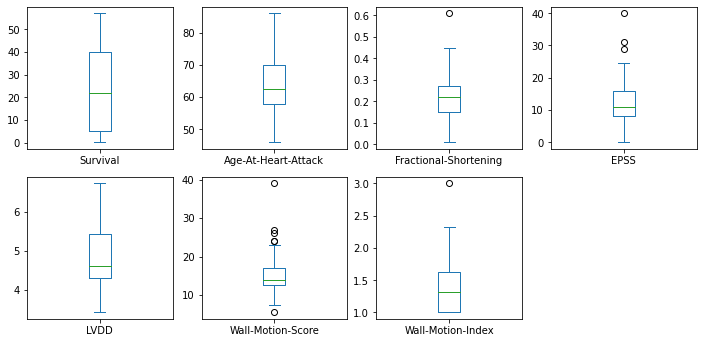

In [81]:
boxplot_data.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

In [82]:
Q1 = boxplot_data.quantile(0.25)
Q3 = boxplot_data.quantile(0.75)
IQR = Q3 - Q1

In [83]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

upper_outliers = boxplot_data > upper_bound
lower_outliers = boxplot_data < lower_bound 

wout_outliers = boxplot_data[~(upper_outliers | lower_outliers)]
wout_outliers.shape

(61, 7)

In [84]:
wout_outliers = wout_outliers.dropna()
wout_outliers.shape

(52, 7)

We can now observe less values outside the first and third quartile. Some stay because their value are not so aberrant. 

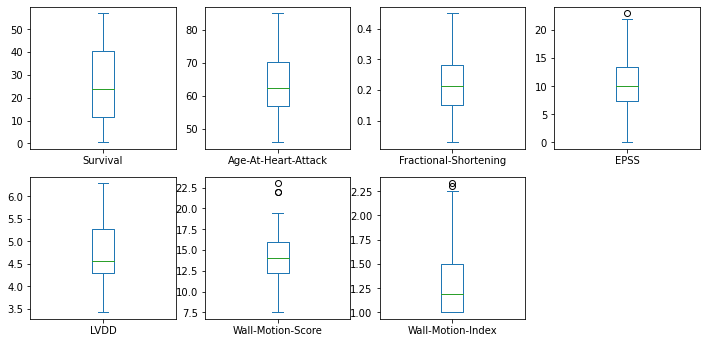

In [85]:
wout_outliers.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

## Check class invariants
First, we need to add again the features that we removed because they took only boolean values. 

In [86]:
kept_ind = wout_outliers.index.to_list()
data = data_wout_nan.loc[kept_ind]

Then, let's visually check which class has invariants. 

Text(0.5, 1.0, 'Classes distribution')

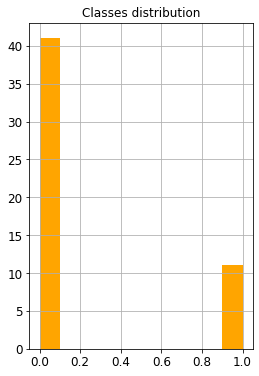

In [87]:
data['Alive-At1'].hist(bins=10, figsize=(4, 6), xlabelsize=12, ylabelsize=12, color='orange') # Plot a histogram for each feature. Define the size of the figure (12,18); change the number of bins as well and the xlabel and ylabel sizes
plt.title('Classes distribution')

We can observe that our data lacks individuals who are still alive after 1 year. Let's perform oversampling to add more indiviudals with 1 'Alive-At1' value. 

## Oversampling
As we do not have individuals with who survived at 1 year (Alive-At1 feature), we use oversampling to achieve more of them. This technique needs first to divide the data into inputs and outputs. 

### Define the input and output data 

In [88]:
Y = data['Alive-At1']
X = data.drop(columns=['Alive-At1'])
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (52, 9)
Y shape: (52,)


### SMOTE method 

In [89]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_sampled, Y_sampled = sm.fit_resample(X, Y)
print(X_sampled.shape, Y_sampled.shape)


(82, 9) (82,)


Let's display the X values to see if the SMOTE method caused any change in the distribution. 

array([[<AxesSubplot:title={'center':'Survival'}>,
        <AxesSubplot:title={'center':'Still-Alive'}>,
        <AxesSubplot:title={'center':'Age-At-Heart-Attack'}>],
       [<AxesSubplot:title={'center':'Pericardial-effusion'}>,
        <AxesSubplot:title={'center':'Fractional-Shortening'}>,
        <AxesSubplot:title={'center':'EPSS'}>],
       [<AxesSubplot:title={'center':'LVDD'}>,
        <AxesSubplot:title={'center':'Wall-Motion-Score'}>,
        <AxesSubplot:title={'center':'Wall-Motion-Index'}>]], dtype=object)

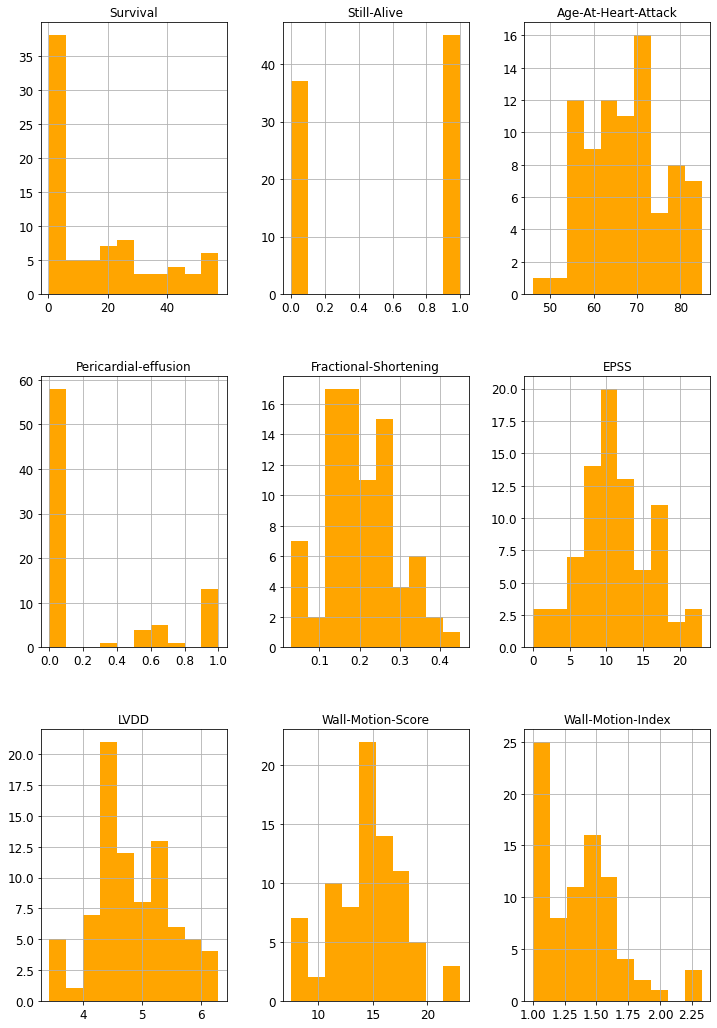

In [90]:
X_sampled.hist(bins=10, figsize=(12, 18), xlabelsize=12, ylabelsize=12, color='orange') 

Problem, it has created individuals with Pericardial-Effusion values different than 0 and 1. So, we are going to set to 0 those who got a value inferior to 0.5 and to 1 those who got a value superior to 0.5. 

In [91]:
X_sampled['Pericardial-effusion'][X_sampled['Pericardial-effusion'] < 0.5] = 0
X_sampled['Pericardial-effusion'][X_sampled['Pericardial-effusion'] > 0.5] = 1

In [92]:
X_sampled['Pericardial-effusion'].value_counts()

0.0    59
1.0    23
Name: Pericardial-effusion, dtype: Int64

Text(0.5, 1.0, 'Alive-At-1year Outcomes')

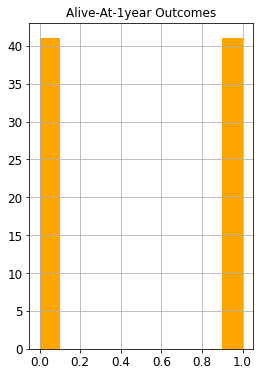

In [93]:
Y_sampled.hist(bins=10, figsize=(4, 6), xlabelsize=12, ylabelsize=12, color='orange')
plt.title('Alive-At-1year Outcomes')

# Training and testing sets
Now, it is time to divide our dataset in training and testing sets. We choose to keep only 20% of the individuals for testing. 

In [94]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X_sampled, Y_sampled, test_size=0.2, random_state=50)

In [95]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)    

X_train shape: (65, 9)
X_test shape: (17, 9)
Y_train shape: (65,)
Y_test shape: (17,)


Let's check that the classes are correctly balanced in each set. 

(<AxesSubplot:title={'center':'Alive-At-1year in training'}>,
 <AxesSubplot:title={'center':'Alive-At-1year in training'}>,
 Text(0.5, 1.0, 'Alive-At-1year in training'))

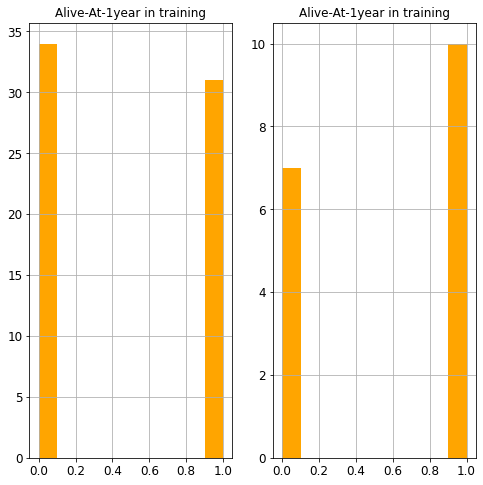

In [96]:
plt.subplot(1,2,1), Y_train.hist(figsize=(8, 8), xlabelsize=12, ylabelsize=12, color='orange'), plt.title('Alive-At-1year in training')
plt.subplot(1,2,2), Y_test.hist(figsize=(8, 8), xlabelsize=12, ylabelsize=12, color='orange'), plt.title('Alive-At-1year in training')


We can observe that the distribution is quite uniform. Then, we will keep this repartition for training and testing. 

# Normalize the datasets
The training and testing sets are not normalized. In order to enable our model to converge, we will try to normalize it with MinMax and Standard normalization. 

In [97]:
X_train.head()

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index
9,10.0,1.0,77.0,0.0,0.13,16.0,4.23,18.0,1.8
1,19.0,0.0,72.0,0.0,0.38,6.0,4.1,14.0,1.7
63,0.616691,1.0,69.0,1.0,0.208656,11.466763,4.995405,18.700144,1.632999
75,3.244985,1.0,71.780007,0.0,0.1934,4.965913,5.199905,7.804998,1.195002
57,0.5,1.0,72.711311,0.0,0.227113,13.002452,6.053176,7.609439,1.521783


## Min Max scaler
Scales each feature to [0,1] range. 

In [98]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler()
minmax_scaled_x_train = minmax_scaler.fit(X_train)
minmax_scaled_x_train = minmax_scaler.transform(X_train) # we keep the array because it is what we will in the next part of the project
minmax_scaled_x_train = pd.DataFrame(minmax_scaled_x_train, columns=X_train.columns)
minmax_scaled_x_train.head()

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index
0,0.168142,1.0,0.854876,0.0,0.238095,0.695652,0.282230,0.677419,0.601504
1,0.327434,0.0,0.716993,0.0,0.833333,0.260870,0.236934,0.419355,0.526316
2,0.002065,1.0,0.634263,1.0,0.425372,0.498555,0.548921,0.722590,0.475939
3,0.048584,1.0,0.710926,0.0,0.389048,0.215909,0.620176,0.019677,0.146618
4,0.000000,1.0,0.736608,0.0,0.469317,0.565324,0.917483,0.007061,0.392318


As the MinMax scaler depends on standard deviation of the data, it is important to normalize each set separately.

In [99]:
minmax_scaled_x_test = minmax_scaler.fit(X_test)
minmax_scaled_x_test = minmax_scaler.transform(X_test)
minmax_scaled_x_test = pd.DataFrame(minmax_scaled_x_test, columns=X_test.columns)

As the output data has values of 0 and 1, it does not need to be normalized. 

## Z-norm normalization (Standardization) 
As we do not know the need of our models for the next part of the project, we also chose to perform standardization of our data. By applying standardization, each column will have mean 0 and the standard deviation 1. 

In [100]:
znorm_scaler = StandardScaler()
znorm_scaled_x_train = znorm_scaler.fit(X_train)
znorm_scaled_x_train = znorm_scaler.transform(X_train)
znorm_scaled_x_train = pd.DataFrame(znorm_scaled_x_train, columns=X_train.columns)
znorm_scaled_x_train.head()

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index
0,-0.418269,0.984732,1.151646,-0.571429,-0.847512,0.968034,-0.810312,1.099251,1.326484
1,0.092008,-1.015505,0.589161,-0.571429,2.028682,-1.045940,-1.004514,-0.172612,1.020144
2,-0.950279,0.984732,0.251670,1.750000,0.057409,0.055052,0.333095,1.321873,0.814892
3,-0.801262,0.984732,0.564412,-0.571429,-0.118107,-1.254203,0.638590,-2.142411,-0.526868
4,-0.956895,0.984732,0.669181,-0.571429,0.269753,0.364336,1.913258,-2.204593,0.474194


As we did above, We also perform the normalization on the test dataset. 

In [101]:
znorm_scaled_x_test = minmax_scaler.fit(X_test)
znorm_scaled_x_test = minmax_scaler.transform(X_test)
znorm_scaled_x_test = pd.DataFrame(znorm_scaled_x_test, columns=X_test.columns)

# Save the datasets
As we do not know the impact of the SMOTE method, we will save the data before and after oversampling. We will also save znorm and minmax normalized datasets to assess their influence on the performances of the models. 

In [102]:
data.to_csv("selected_data.csv", index=False) # The whole dataset after removing outliers

# The different train and test input sets with SMOTE oversampling
minmax_scaled_x_train.to_csv("minmax_scaled_x_train.csv", index=False)
minmax_scaled_x_test.to_csv("minmax_scaled_x_test.csv", index=False)
znorm_scaled_x_train.to_csv("znorm_scaled_x_train.csv", index=False)
znorm_scaled_x_test.to_csv("znorm_scaled_x_test.csv", index=False)

# The training and testing output sets with SMOTE oversampling
Y_train.to_csv("Y_train.csv", index=False)
Y_test.to_csv("Y_test.csv", index=False)